In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
main=pd.read_csv("C:\\Users\\surya\\Downloads\\student depression.csv")
main.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [3]:
main = main.drop(['id'], axis=1)

main.loc[main['Gender'] == 'Male', 'Gender'] = 0
main.loc[main['Gender'] == 'Female', 'Gender'] = 1
main.head(3)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,1,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,0,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0


In [5]:
main['City'].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Kibara                   1
Nandini                  1
Nalini                 

In [7]:
cities_to_remove = main['City'].value_counts()[main['City'].value_counts() < 400]
main = main[~main['City'].isin(cities_to_remove.index)]
main['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

In [9]:
main['Profession'].value_counts()

Profession
Student                   27844
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [11]:
main = main.loc[main['Profession'] == 'Student']
main['Profession'].value_counts()

Profession
Student    27844
Name: count, dtype: int64

In [13]:
main = main.drop(['Profession'], axis=1)

In [15]:
main['Work Pressure'].value_counts()

Work Pressure
0    27841
5        2
2        1
Name: count, dtype: int64

In [17]:
main = main.drop(['Work Pressure'], axis=1)
main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33,Visakhapatnam,5,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,1,24,Bangalore,2,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,0,31,Srinagar,3,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0


In [19]:
main['Age'].value_counts()

Age
24    2255
20    2235
28    2128
29    1940
33    1892
25    1780
21    1718
23    1640
18    1586
19    1560
34    1466
27    1459
31    1422
32    1258
22    1159
26    1153
30    1144
35      10
38       8
36       7
42       4
48       3
39       3
43       2
46       2
37       2
49       1
51       1
44       1
59       1
54       1
58       1
56       1
41       1
Name: count, dtype: int64

In [21]:
main = main.loc[main['Age'] <= 30]
main['Age'].value_counts()

Age
24    2255
20    2235
28    2128
29    1940
25    1780
21    1718
23    1640
18    1586
19    1560
27    1459
22    1159
26    1153
30    1144
Name: count, dtype: int64

In [23]:
main['Academic Pressure'].value_counts()

Academic Pressure
3    5785
5    5167
4    4112
1    3546
2    3140
0       7
Name: count, dtype: int64

In [25]:
main = main.loc[main['Academic Pressure'] > 0]
main['Academic Pressure'].value_counts()

Academic Pressure
3    5785
5    5167
4    4112
1    3546
2    3140
Name: count, dtype: int64

In [27]:
main['Study Satisfaction'].value_counts()

Study Satisfaction
4    4825
2    4686
3    4448
1    4336
5    3453
0       2
Name: count, dtype: int64

In [29]:
main = main.loc[main['Study Satisfaction'] > 0]
main['Study Satisfaction'].value_counts()

Study Satisfaction
4    4825
2    4686
3    4448
1    4336
5    3453
Name: count, dtype: int64

In [31]:
main = main.drop(['Job Satisfaction'], axis=1)
main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,1,24,Bangalore,2,5.90,5,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
3,1,28,Varanasi,3,5.59,2,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,1,25,Jaipur,4,8.13,3,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [33]:
main['Sleep Duration'].value_counts()
main = main.loc[main['Sleep Duration'] != 'Others']
main['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    6515
7-8 hours            5732
5-6 hours            4787
More than 8 hours    4702
Name: count, dtype: int64

In [35]:
main.loc[main['Sleep Duration'] == 'Less than 5 hours', 'Sleep Duration'] = 0
main.loc[main['Sleep Duration'] == '5-6 hours', 'Sleep Duration'] = 1
main.loc[main['Sleep Duration'] == '7-8 hours', 'Sleep Duration'] = 2
main.loc[main['Sleep Duration'] == 'More than 8 hours', 'Sleep Duration'] = 3
main['Sleep Duration'].value_counts()

Sleep Duration
0    6515
2    5732
1    4787
3    4702
Name: count, dtype: int64

In [37]:
main.loc[main['Dietary Habits'] == 'Healthy', 'Dietary Habits'] = 0
main.loc[main['Dietary Habits'] == 'Unhealthy', 'Dietary Habits'] = 1
main.loc[main['Dietary Habits'] == 'Moderate', 'Dietary Habits'] = 2
main['Dietary Habits'].value_counts()

Dietary Habits
1         8353
2         7591
0         5783
Others       9
Name: count, dtype: int64

In [39]:
main = main.loc[main['Dietary Habits'] != 'Others']
main['Dietary Habits'].value_counts()

Dietary Habits
1    8353
2    7591
0    5783
Name: count, dtype: int64

In [41]:
main['Degree'].unique()

array(['BSc', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed', 'M.Ed', 'MSc',
       'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Pharm', 'B.Com', 'MD', 'BE',
       'BA', 'MBBS', 'B.Arch', 'LLM', 'B.Tech', 'BBA', 'M.Com', 'ME',
       'MBA', 'LLB', 'Others', 'MHM'], dtype=object)

In [43]:
main.loc[main['Degree'].str.contains(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|BA|B.Arch|B.Tech|BBA|LLB', regex=True), 'New_Degree'] = 'Graduated'
main.loc[main['Degree'].str.contains(r'MSc|MCA|M.Ed|M.Pharm|M.Com|ME|MA|M.Arch|M.Tech|MBA|LLM', regex=True), 'New_Degree'] = 'Post Graduated'
main.loc[main['Degree'] == 'Class 12', 'New_Degree'] = 'Higher Secondary'
main = main.loc[main['Degree'] != 'Others']
main['New_Degree'].value_counts()

New_Degree
Graduated           9782
Higher Secondary    5839
Post Graduated      4870
Name: count, dtype: int64

In [45]:
main.loc[main['New_Degree'] == 'Graduated', 'New_Degree'] = 0
main.loc[main['New_Degree'] == 'Post Graduated', 'New_Degree'] = 1
main.loc[main['New_Degree'] == 'Higher Secondary', 'New_Degree'] = 2
main['New_Degree'].value_counts()

New_Degree
0    9782
2    5839
1    4870
Name: count, dtype: int64

In [47]:
main['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    14265
No      7434
Name: count, dtype: int64

In [49]:
main.loc[main['Have you ever had suicidal thoughts ?'] == 'Yes', 'Have you ever had suicidal thoughts ?'] = 1
main.loc[main['Have you ever had suicidal thoughts ?'] == 'No', 'Have you ever had suicidal thoughts ?'] = 0
main['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
1    14265
0     7434
Name: count, dtype: int64

In [51]:
main['Work/Study Hours'].value_counts()

Work/Study Hours
10    3358
12    2443
11    2320
8     1928
6     1758
9     1601
7     1585
0     1272
2     1229
4     1224
3     1098
5      994
1      889
Name: count, dtype: int64

In [53]:
main['Financial Stress'].value_counts()

Financial Stress
5.0    5456
4.0    4614
3.0    4044
2.0    3900
1.0    3683
Name: count, dtype: int64

In [55]:
main['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     11190
Yes    10509
Name: count, dtype: int64

In [57]:
main.loc[main['Family History of Mental Illness'] == 'Yes', 'Family History of Mental Illness'] = 1
main.loc[main['Family History of Mental Illness'] == 'No', 'Family History of Mental Illness'] = 0
main['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
0    11190
1    10509
Name: count, dtype: int64

In [59]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21699 entries, 1 to 27900
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 21699 non-null  object 
 1   Age                                    21699 non-null  int64  
 2   City                                   21699 non-null  object 
 3   Academic Pressure                      21699 non-null  int64  
 4   CGPA                                   21699 non-null  float64
 5   Study Satisfaction                     21699 non-null  int64  
 6   Sleep Duration                         21699 non-null  object 
 7   Dietary Habits                         21699 non-null  object 
 8   Degree                                 21699 non-null  object 
 9   Have you ever had suicidal thoughts ?  21699 non-null  object 
 10  Work/Study Hours                       21699 non-null  int64  
 11  Financi

In [61]:
main.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
count,21699.000000,21699.000000,21699.000000,21699.000000,21699.000000,21697.000000,21699.000000
mean,23.914282,3.193972,7.665148,2.924743,7.207659,3.196341,0.634730
std,3.692113,1.378077,1.456396,1.365403,3.688414,1.427862,0.481517
min,18.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,6.350000,2.000000,4.000000,2.000000,0.000000
50%,24.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
75%,27.000000,4.000000,8.910000,4.000000,10.000000,5.000000,1.000000
max,30.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000


In [63]:
main.dtypes

Gender                                    object
Age                                        int64
City                                      object
Academic Pressure                          int64
CGPA                                     float64
Study Satisfaction                         int64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                           int64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
New_Degree                                object
dtype: object

In [65]:
main.isnull().sum()

Gender                                      0
Age                                         0
City                                        0
Academic Pressure                           0
CGPA                                        0
Study Satisfaction                          0
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            2
Family History of Mental Illness            0
Depression                                  0
New_Degree                               1208
dtype: int64

In [67]:
main = main.dropna()

In [69]:
main.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
New_Degree                               0
dtype: int64

In [71]:
main.duplicated().sum()

0

<Axes: ylabel='Depression'>

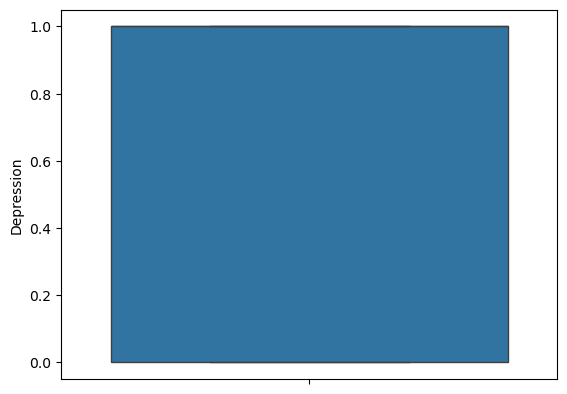

In [73]:
sns.boxplot(main['Depression'])

In [75]:
main_data = main[['Gender', 'Age', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New_Degree']]
main_data.head(3)

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
1,1,24,2,5.90,5,1,2,0,3,2.0,1,0,0
3,1,28,3,5.59,2,2,2,1,4,5.0,1,1,0
4,1,25,4,8.13,3,1,2,1,1,1.0,0,0,1


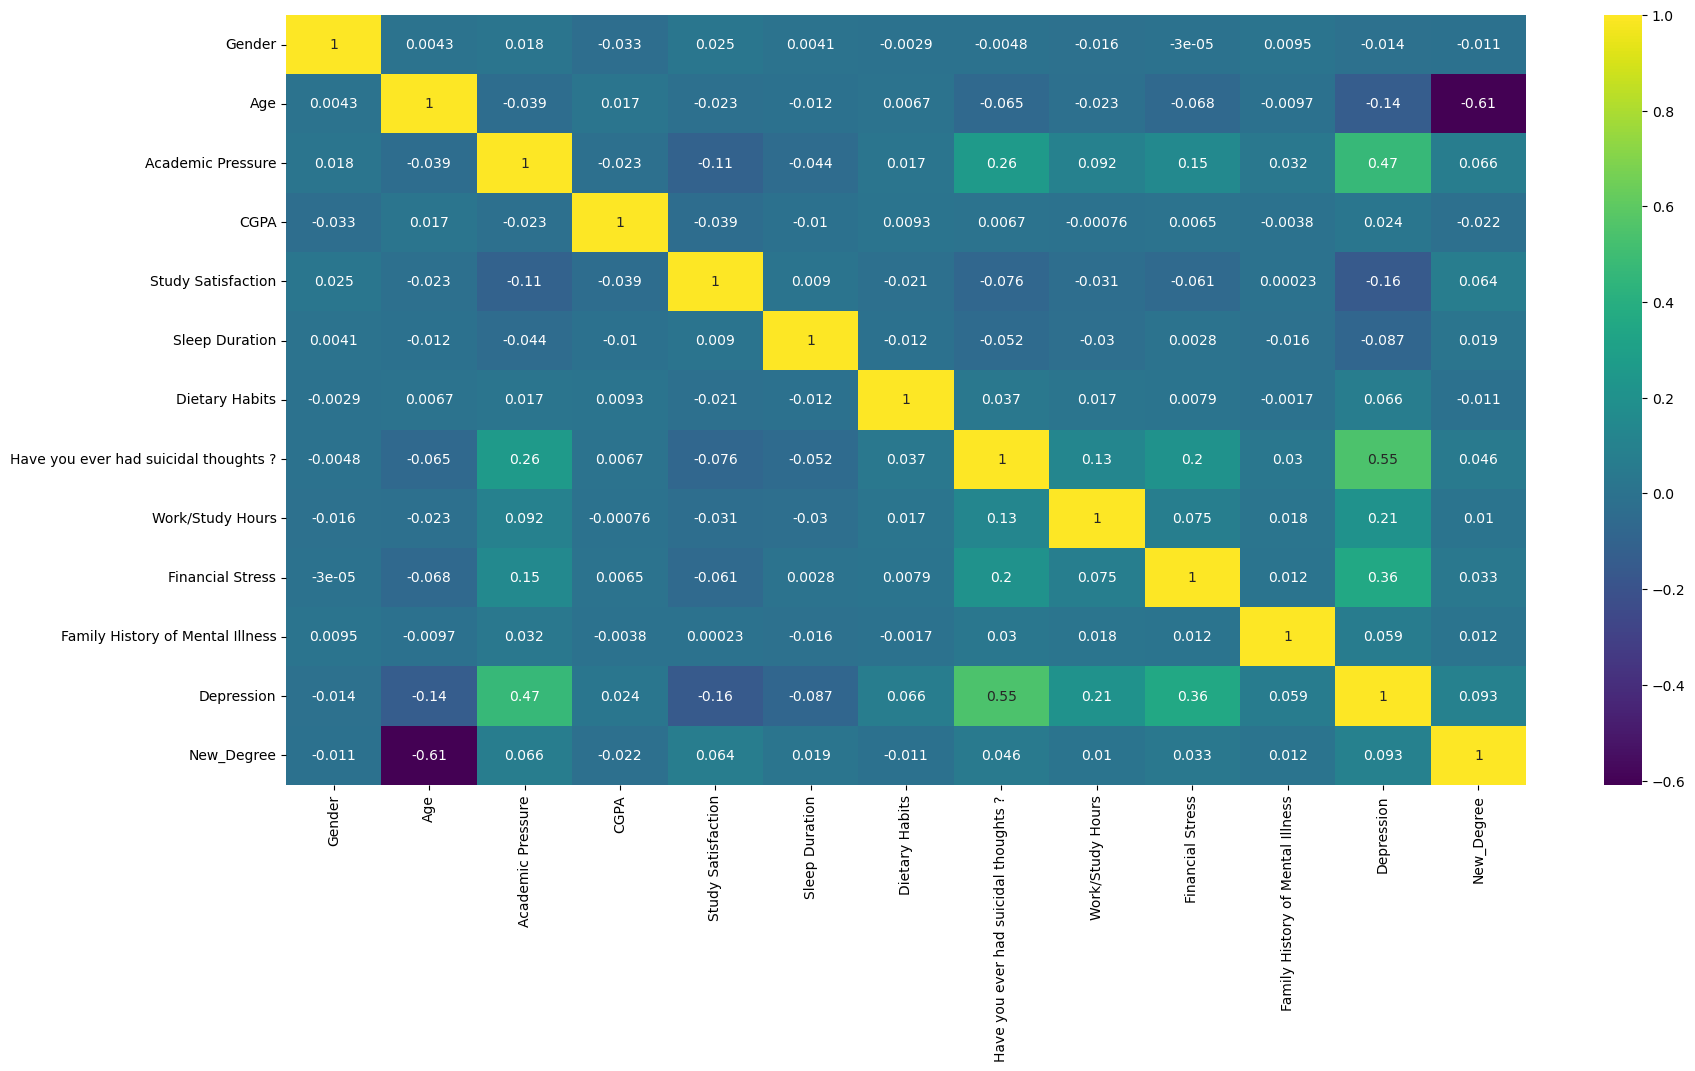

In [89]:
plt.figure(figsize=(20, 10))
sns.heatmap(main_data.corr(), annot=True, cmap='viridis')
plt.show()

In [91]:
encoder = OneHotEncoder(sparse_output=False)  
encoded = encoder.fit_transform(main[['City']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['City']))

encoded_df.index = main.index
main_encoded = pd.concat([main, encoded_df], axis=1)

main_encoded.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New_Degree', 'City_Agra', 'City_Ahmedabad', 'City_Bangalore',
       'City_Bhopal', 'City_Chennai', 'City_Delhi', 'City_Faridabad',
       'City_Ghaziabad', 'City_Hyderabad', 'City_Indore', 'City_Jaipur',
       'City_Kalyan', 'City_Kanpur', 'City_Kolkata', 'City_Lucknow',
       'City_Ludhiana', 'City_Meerut', 'City_Mumbai', 'City_Nagpur',
       'City_Nashik', 'City_Patna', 'City_Pune', 'City_Rajkot',
       'City_Srinagar', 'City_Surat', 'City_Thane', 'City_Vadodara',
       'City_Varanasi', 'City_Vasai-Virar', 'City_Visakhapatnam'],
      dtype='object')

In [96]:
main_encoded = main_encoded.drop(['City', 'Degree'], axis=1)

In [102]:
X = main_encoded.drop('Depression', axis=1).values  
y = main_encoded['Depression'].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

gb_model = GradientBoostingClassifier()

gb_model.fit(X_train_scaled, y_train)

y_pred_gb = gb_model.predict(X_test_scaled)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Model Accuracy: {gb_accuracy * 100:.2f}%")

gb_classification_report = classification_report(y_test, y_pred_gb)
print("Classification Report for Gradient Boosting Model:")
print(gb_classification_report)


Gradient Boosting Model Accuracy: 85.48%
Classification Report for Gradient Boosting Model:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1471
           1       0.87      0.91      0.89      2627

    accuracy                           0.85      4098
   macro avg       0.85      0.83      0.84      4098
weighted avg       0.85      0.85      0.85      4098



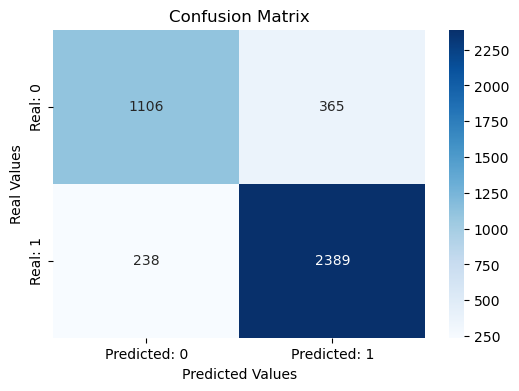

In [104]:
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Real: 0', 'Real: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.show()